In [5]:
import numpy as np # utile pour la gestion des tableaux (array)
import matplotlib.pyplot as plt # outils pour la création de graphiques
from scipy.optimize import curve_fit # outils pour l'ajustement de fonctions
from scipy import odr # module pour la prise en compte des incertitudes sur y ET X

# Optionnel, pour créer des graphiques avec une police de caractère spécifique
# et pour l'utilisation de code LaTeX
# from matplotlib import rc 
# rc('font', **{'family':'serif','serif':['Palatino'], 'size':14})
# rc('text', usetex=True)

# Votre numéro de groupe :
groupe = 1

In [6]:
# Déclaration des mesures dans des tableaux
M = np.array([2.1,3.4,6.2,9.9])
T = np.array((17.4,39.2,48.7,102.1))

# En considérant une incertitude globale valable pour toutes les mesures
eM = 0.0002/np.sqrt(3)
eT = 0.1/np.sqrt(3)

# En considérant les incertitudes individuelles associées à chaque mesures
# eT = np.array([5.,4.5,6.3,8.0])
# eM = np.array([0.2, 0.4, 0.9,0.5])

In [7]:
# Définition de la fonction qu'on utilise pour modéliser les données
def droite(parametres, x):
    
    a, b = parametres
    return a*x + b

# Création de l'objet "modele" (qui contient fonction et paramètres à ajuster)
modele = odr.Model(droite)

# Création de l'objet "mesures" qui contient l'ensemble des mesures+incertitudes
# Cet objet est utilisé comme input dans l'objet "modele" lorsqu'on effectue la régression
mesures = odr.RealData(M, T, sx=eM, sy=eT)

# Création de l'objet "ajustement", qui lie mesures, modèle à ajuster et paramètres initiaux ("beta0")
ajustement = odr.ODR(mesures, modele, beta0=[1., -1.])

# Calcul de l'ajustement par régression linéaire
regression = ajustement.run()

# Impression des paramètres qui ajustent le mieux les données, avec leurs incertitudes
p_opt = np.asarray(regression.beta)
p_err = np.asarray(regression.sd_beta) # sd -> standard deviation
for i in range(len(p_opt)):
    print (p_opt[i], p_err[i])
red_chi = regression.res_var

10.134106678947168 1.7023017253783679
-2.87417319333677 10.508178398962315


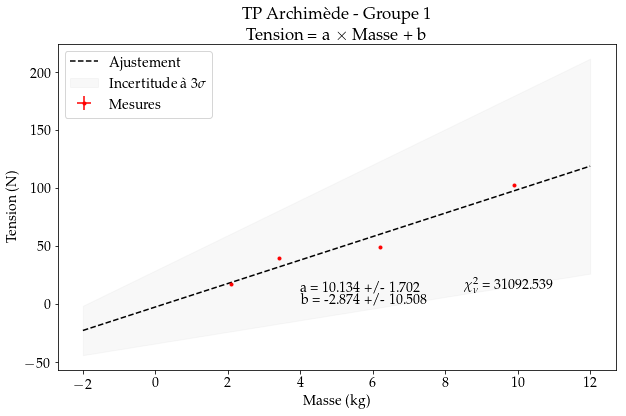

In [8]:
# Représentation graphique des résultats de l'ajustement

# Création de l'axe des abscisses (masse)
x = np.linspace(-2.,12.,100)

# Déclaration de la figure et des axes
fig, ax = plt.subplots(1, figsize=(10,6))

# Nombre de déviations standards visibles sur le graphique (typiquement 1, 3 ou 5)
n_sigma=3

# Génération de listes comprenant l'ajustement et les valeurs extrêmes
ajustement_opt  = droite(p_opt, x)
ajustement_haut = droite(p_opt + n_sigma*p_err, x)
ajustement_bas  = droite(p_opt - n_sigma*p_err, x)

# Affichage de la régression + incertitudes des paramètres
ax.plot(x, ajustement_opt, '--', color='black', label='Ajustement')
ax.fill_between(x, ajustement_haut, ajustement_bas, color='grey', alpha=0.05, label='Incertitude \\`a '+str(n_sigma)+'$\\sigma$')

# Affichage des mesures + incertitudes
ax.errorbar(M, T, xerr=eM, yerr=eT, fmt='.', color='red', label='Mesures')

# On oublie pas de nommer les axes et de leur donner une unité !!
ax.set_xlabel('Masse (kg)')
ax.set_ylabel('Tension (N)')
ax.set_title('TP Archim\\`ede - Groupe '+str(groupe)+' \n Tension = a $\\times$ Masse + b')

# Rajouter du texte sur le graphique
# ax.text(X, Y, "texte")
ax.text(4, 10, "a = "+str(round(p_opt[0],3))+" +/- "+str(round(p_err[0],3)))
ax.text(4, 0, "b = "+str(round(p_opt[1],3))+" +/- "+str(round(p_err[1],3)))
ax.text(8.5, 10, "$\\chi ^2_{\\nu}$ = "+str(round(red_chi,3)))

ax.legend(loc="upper left")

# Optionnel, pour sauvegarder la figure à l'emplacement donné
#
# PATH = '/home/foo/TP-archi/'
# savefig(PATH+'archi_grpe1_T-vs-M.pdf')